In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as ani

In [2]:
#######################
#
#1-D wave equation with drag and stiffness
#
#   d^2y        dy       [  d^2y                d^4 y]
#   ---- = -2b --- + c^2 [  ----  - epsilon*L^2  -----]
#   dt^2        dt       [  dx^2                dx^4 ]
#
# where y = y(x,t) is the wave displacement and c is the wave speed.
# 


In [182]:
###Function definitions
#constants
N=100; L=1.9;t0=0.0;tf=40.0;nt=100000; 
dt=(tf-t0)/nt
x=np.arange(0,L,(L/N))
dx=x[1]-x[0]
c=120.0
eps=.5e-7
C=(c*dt/dx)**2
s= -C*eps*(dx/dt)**2

w0 = c/(2*L);w=L/10;amp = .1

#RK4:
b= -2*.5
def deriv(u,v):
    return(np.array([v,(v*b)+(-c**2)*((u)*C)]))

print(C)

6.382271468144046


\begin{equation}
    \frac{\partial^4 y}{\partial x^4} = \frac{y(x-2dx)-4y(x-dx)+6y(x)-4y(x+dx)+y(x+2dx)}{dx^4}
\end{equation}

[0.00000000e+00 2.53987384e-04 6.51734208e-07 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


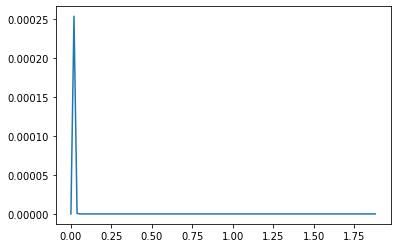

[-0.00814202         nan         nan         nan         nan         nan]


<ipython-input-183-fa1ff64feee3>:18: RuntimeWarning: overflow encountered in multiply
  u0[1:-1], u[1:-1] = u[1:-1], -b*(u[1:-1]-u0[1:-1])*dt+(C*(u0[2:]+u0[:-2]-(2*u0[1:-1])))
<ipython-input-183-fa1ff64feee3>:18: RuntimeWarning: overflow encountered in subtract
  u0[1:-1], u[1:-1] = u[1:-1], -b*(u[1:-1]-u0[1:-1])*dt+(C*(u0[2:]+u0[:-2]-(2*u0[1:-1])))
<ipython-input-183-fa1ff64feee3>:18: RuntimeWarning: invalid value encountered in add
  u0[1:-1], u[1:-1] = u[1:-1], -b*(u[1:-1]-u0[1:-1])*dt+(C*(u0[2:]+u0[:-2]-(2*u0[1:-1])))
<ipython-input-183-fa1ff64feee3>:18: RuntimeWarning: overflow encountered in add
  u0[1:-1], u[1:-1] = u[1:-1], -b*(u[1:-1]-u0[1:-1])*dt+(C*(u0[2:]+u0[:-2]-(2*u0[1:-1])))
<ipython-input-183-fa1ff64feee3>:18: RuntimeWarning: invalid value encountered in subtract
  u0[1:-1], u[1:-1] = u[1:-1], -b*(u[1:-1]-u0[1:-1])*dt+(C*(u0[2:]+u0[:-2]-(2*u0[1:-1])))


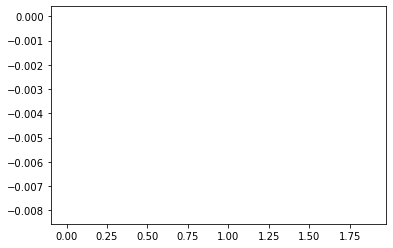

[0.01622997        nan        nan        nan        nan        nan]


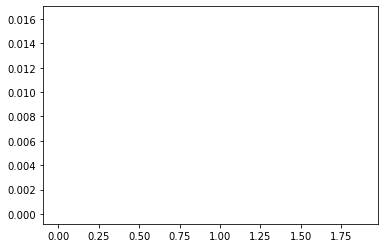

[-0.02421015         nan         nan         nan         nan         nan]


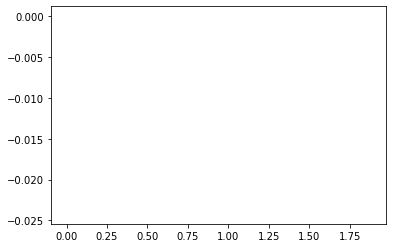

[0.03202957        nan        nan        nan        nan        nan]


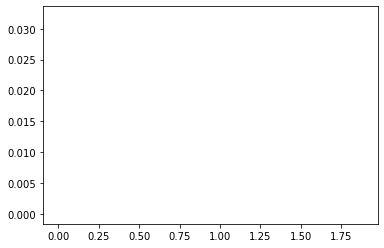

In [183]:


u=np.zeros(N,float)
u0=u.copy()
v=0.0*u

a=.1
drivef=w0/2
u[0]=a*np.sin(dt);u[-1]=0; u[-1]=0;  v[0]=0;v[-1]=0
v[1:-1]+=C*(u[2:]+u[0:-2]-2*u[1:-1])
u[1:-1]+=dt*v[1:-1]

u0=u.copy()



#leapfrog
for i in np.arange(0.0,tf+dt,dt):
    u[0]=a*np.sin(drivef*i)
    u0[1:-1], u[1:-1] = u[1:-1], -b*(u[1:-1]-u0[1:-1])*dt+(C*(u0[2:]+u0[:-2]-(2*u0[1:-1])))
    u0[0]=u[0];
    if i in [0.0,1.0,2.0,3.0,4.0]:
        print(u[0:6])
        plt.plot(x,u)
        plt.show()
#     if i in [0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0]:
#         plt.plot(x,u)
plt.show()

In [46]:
-1.380115509216919e+307/-7.369980146986926e+305

18.726176756136212

In [274]:
9.86481904650816e+306/1.6374411350751758e+307

0.6024533545173983

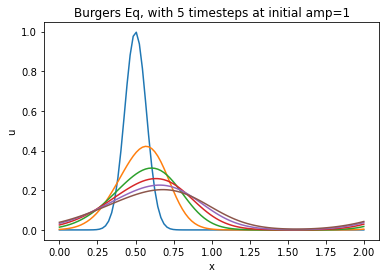

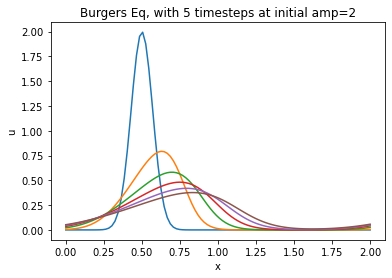

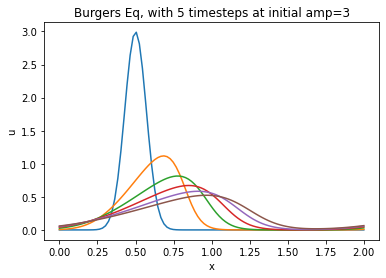

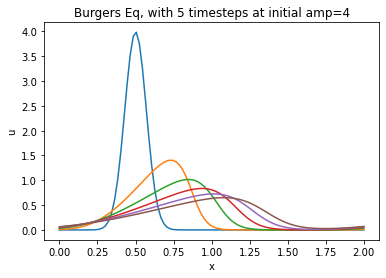

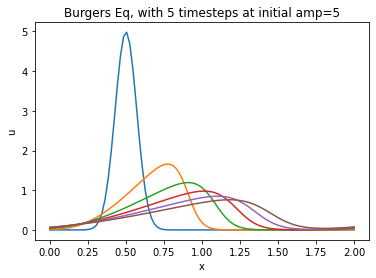

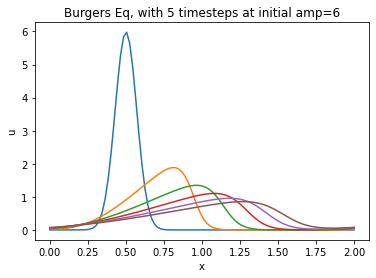

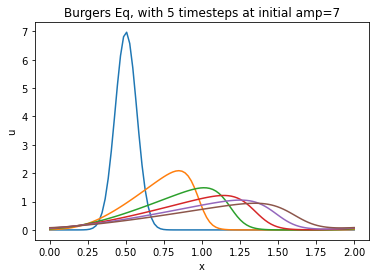

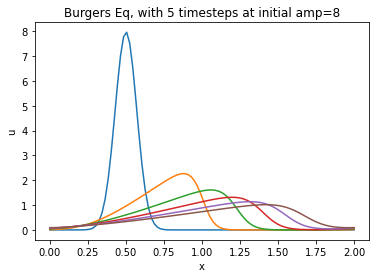

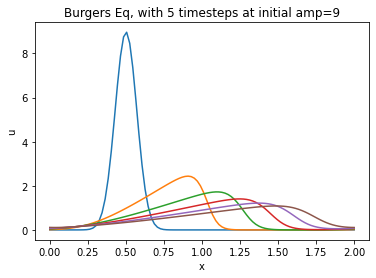

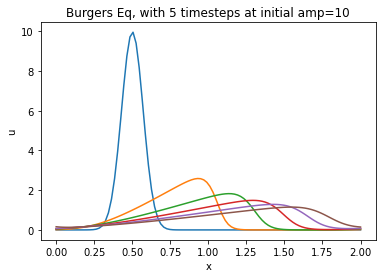

In [278]:

#constants
N=100
L=2.0
tf=1.0
# tf=8.0
x=np.linspace(0,L,N)
dx=x[1]-x[0]
dt=tf/10000
nu=.05
u=np.zeros(N,float);v=np.zeros(N,float)


#for p in np.arange(0,11,1):
for p in np.arange(1,11,1):
    #intial gauss bump
    u=p*np.exp(-((x-.5)**2)/(.1**2))
    for i in np.arange(0,tf+dt,dt):
        u0 = u.copy()
        for z in range(1, N-1):
            #euler-chromer steps
            u[z] = u0[z]-u0[z]*dt/dx*(u0[z]-u0[z-1])+nu*dt/dx**2*(u0[z+1]-2*u0[z]+u0[z-1])
        u[0]=u[-2]; u[-1]=u[1]
        if i in [0.0,0.2,0.4,0.6,0.8,1.0]:
            plt.plot(x,u)

    plt.title('Burgers Eq, with 5 timesteps at initial amp=%.0f' %p)
    plt.ylabel("u")
    plt.xlabel("x")
    plt.show()